# Used Cars Price Prediction System


## Libraries, Dataset importing and analyzing


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Dataset.csv')
pd.set_option('display.max_columns',None)
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Unnamed: 0           6019 non-null int64
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [5]:
df.rename({'Unnamed: 0':'index'},axis=1,inplace=True)
df

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [6]:
df.dtypes

index                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

<br><br>
## Data Preprocessing/Cleaning



### 1. Converting numeric data

In [7]:
def extract_num(X):
    return str(X).split('km')[0]
df['Mileage'] = df['Mileage'].apply(extract_num)
df

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998 CC,67.1 bhp,5.0,NaN,2.65


In [8]:
l = ['Engine','Power','New_Price']
def extract_num2(X):
    return str(X).split()[0]
for col in l:
    df[col] = df[col].apply(extract_num2)
df

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,nan,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,nan,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,nan,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,nan,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,7.88,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,nan,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,nan,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,nan,2.65


In [9]:
df.dtypes

index                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [10]:
for col in ['Mileage','Engine','Power','New_Price']:
    df[col] = pd.to_numeric(df[col],errors='coerce')
df.dtypes

index                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
dtype: object

<br><br>
### 2. Splitting data into training and testing set


In [11]:
from sklearn.model_selection import train_test_split
df_train,df_test,y_train,y_test = train_test_split(df,df['Price'],train_size=0.75, random_state=0)
df_train.shape,df_test.shape

((4514, 14), (1505, 14))

In [12]:
import seaborn as sb
import matplotlib.pyplot as plt

<br><br>
### 3. Outliers Removal from training set


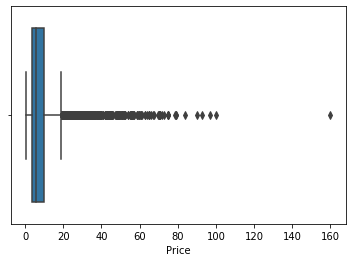

In [13]:
sb.boxplot(df_train['Price'])

In [14]:
df_train.drop(df_train[df_train['Price']>100].index, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


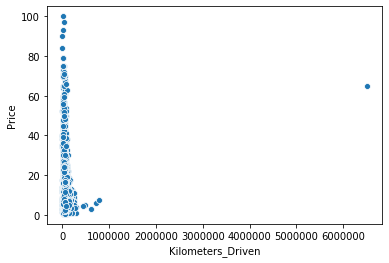

In [15]:
sb.scatterplot(data=df_train,x='Kilometers_Driven',y='Price')

In [16]:
df_train.drop(df_train[df_train['Kilometers_Driven']>1000000].index, inplace=True)

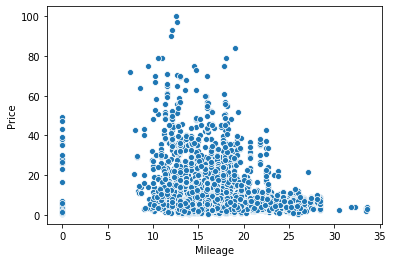

In [17]:
sb.scatterplot(data=df_train,x='Mileage',y='Price')

In [18]:
df_train.drop(df_train[df_train['Mileage']==0].index, inplace=True)

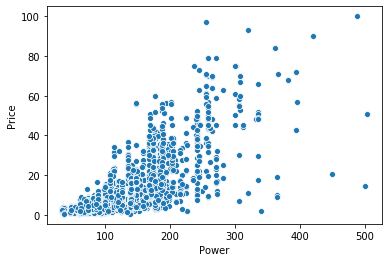

In [25]:
sb.scatterplot(data=df_train,x='Power',y='Price')

In [26]:
df_train.drop(df_train[df_train['Power']>430].index, inplace=True)

In [27]:
df_train.drop(df_train[df_train['Seats']==0].index, inplace=True)

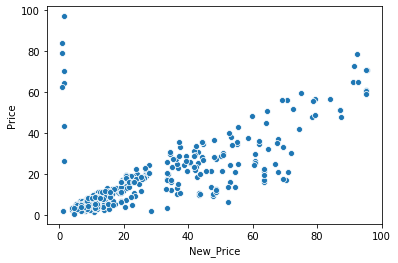

In [28]:
sb.scatterplot(data=df_train,x='New_Price',y='Price')

In [29]:
df_train.drop(df_train[df_train['New_Price']<2].index, inplace=True)

In [30]:
df_train.isna().sum()

index                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 1
Engine                 18
Power                  74
Seats                  22
New_Price            3832
Price                   0
dtype: int64

<br><br>
### 4. Filling NA Values

In [31]:
df_test.isna().sum()

index                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 1
Engine                 11
Power                  36
Seats                  12
New_Price            1308
Price                   0
dtype: int64

In [32]:
for col in ['Mileage','Engine','Power','Seats']:
    df_train[col].fillna(value = df_train[col].median(),inplace=True)
    df_test[col].fillna(value=df_train[col].median(),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [33]:
df_train.dtypes

index                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
dtype: object

In [34]:
df_train.shape,df_test.shape

((4446, 14), (1505, 14))

In [35]:
df=pd.concat([df_train,df_test],axis=0)
df.shape

(5951, 14)

In [36]:
df.corr()

,index,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
index,1.000000,0.001360,-0.009386,0.018774,-0.008612,-0.015207,-0.010388,-0.076392,-0.023966
Year,0.001360,1.000000,-0.446344,0.301364,-0.060608,0.020091,0.012975,-0.015270,0.305147
Kilometers_Driven,-0.009386,-0.446344,1.000000,-0.142210,0.164452,0.007569,0.212194,0.006389,-0.164742
Mileage,0.018774,0.301364,-0.142210,1.000000,-0.632035,-0.534067,-0.342413,-0.337172,-0.332812
Engine,-0.008612,-0.060608,0.164452,-0.632035,1.000000,0.858509,0.416146,0.664240,0.661045
Power,-0.015207,0.020091,0.007569,-0.534067,0.858509,1.000000,0.118993,0.792110,0.782137
Seats,-0.010388,0.012975,0.212194,-0.342413,0.416146,0.118993,1.000000,-0.015908,0.067777
New_Price,-0.076392,-0.015270,0.006389,-0.337172,0.664240,0.792110,-0.015908,1.000000,0.851935
Price,-0.023966,0.305147,-0.164742,-0.332812,0.661045,0.782137,0.067777,0.851935,1.000000


In [ ]:
df.drop('New_Price',axis=1,inplace=True)

<br><br>
### 5. Encoding categorical data

In [39]:
df = pd.get_dummies(df,drop_first=True)
df.shape

(5951, 1869)

In [40]:
columns_obj = list(df.dtypes[df.dtypes == 'object'].index)
df.drop(columns_obj,axis=1,inplace=True)

<br><br>
### 6. Dropping Rendundant columns

In [42]:
df.drop(list(df.corr()['Price'][(df.corr()['Price']<0.1) & (df.corr()['Price']> -0.1)].index),axis=1,inplace=True)
df

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,Name_Audi Q7 3.0 TDI Quattro Premium Plus,Name_Audi Q7 35 TDI Quattro Technology,Name_BMW 5 Series 2013-2017 530d M Sport,Name_BMW 7 Series 740Li,Name_BMW X6 xDrive 40d M Sport,Name_Jaguar XF 2.2 Litre Luxury,Name_Jaguar XJ 3.0L Portfolio,Name_Lamborghini Gallardo Coupe,Name_Mercedes-Benz E-Class 2015-2017 E350 CDI Avantgrade,Name_Mercedes-Benz GL-Class 2007 2012 350 CDI Luxury,Name_Mercedes-Benz GLE 250d,Name_Mercedes-Benz GLE 350d,Name_Mercedes-Benz New C-Class C 220d Avantgarde Edition C,Name_Porsche Panamera Diesel,Location_Coimbatore,Location_Kolkata,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual
1329,2014,61517,16.95,1197.0,78.90,4.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3924,2014,45407,21.10,814.0,55.20,3.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
636,2017,32249,21.90,1498.0,98.60,10.79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
420,2018,40322,18.90,1197.0,81.86,5.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3965,2011,87000,11.70,2354.0,177.60,5.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,2015,37000,18.60,1197.0,81.83,5.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3325,2010,48002,13.14,1798.0,157.80,6.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1875,2014,102418,12.99,2494.0,100.60,10.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2861,2016,61578,18.90,1197.0,82.00,6.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [43]:
df.corr()['Price']

Year                                                          0.305147
Kilometers_Driven                                            -0.164742
Mileage                                                      -0.332812
Engine                                                        0.661045
Power                                                         0.782137
Price                                                         1.000000
Name_Audi Q7 3.0 TDI Quattro Premium Plus                     0.109413
Name_Audi Q7 35 TDI Quattro Technology                        0.111937
Name_BMW 5 Series 2013-2017 530d M Sport                      0.103982
Name_BMW 7 Series 740Li                                       0.144370
Name_BMW X6 xDrive 40d M Sport                                0.108559
Name_Jaguar XF 2.2 Litre Luxury                               0.100586
Name_Jaguar XJ 3.0L Portfolio                                 0.116294
Name_Lamborghini Gallardo Coupe                               0.134481
Name_M

In [44]:
df_train.shape,df_test.shape

((4446, 14), (1505, 14))

In [45]:
X_train = df.iloc[:4446].drop('Price',axis=1)
y_train = df.iloc[:4446]['Price']
X_test = df.iloc[4446:].drop('Price',axis=1)
y_test = df.iloc[4446:]['Price']

<br><br>
## Model Building

    
### Linear Regression<br>

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model_lin = LinearRegression()
model_lin.fit(X_train,y_train)
LR = r2_score(y_test,model_lin.predict(X_test))
LR

0.7652655781558553

### Random Forest Regression<br>

In [47]:
from sklearn.ensemble import RandomForestRegressor
model_rfg = RandomForestRegressor(n_estimators=200,max_depth=13)
model_rfg.fit(X_train,y_train)
RF = r2_score(y_test,model_rfg.predict(X_test))
RF

0.8816791561002878

### XGBoost Regression<br>

In [19]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor(n_estimators=200, max_depth=13, colsample_bytree=0.5, alpha=50, seed=52, 
                         objective='reg:squarederror', learning_rate=0.1)
model_xgb.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [51]:
model_xgb.score(X_train,y_train)

0.9996159507215874

In [52]:
XG = r2_score(y_test,model_xgb.predict(X_test))
XG

0.9010099851338006

In [53]:
y_predict = model_xgb.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE

In [55]:
MSE(y_test,y_predict), MAE(y_test,y_predict)

(12.372294242260084, 1.5874811826116617)

In [57]:
df_scores = pd.DataFrame({'Regression Model':['Linear','Random Forest','XGBoost'],'R-squared score':[LR,RF,XG]})
df_scores

,Regression Model,R-squared score
0,Linear,0.765266
1,Random Forest,0.881679
2,XGBoost,0.901010


In [59]:
df_final = pd.DataFrame({'Car Model':df_test['Name'],'Actual Price':y_test,'Predicted Price':y_predict,
                         'Absolute difference': abs(y_test-y_predict)})
df_final

,Car Model,Actual Price,Predicted Price,Absolute difference
5150,Mahindra XUV500 W6 2WD,7.25,7.495184,0.245184
2164,Maruti Swift VDI BSIV W ABS,4.25,2.520416,1.729584
1136,Volkswagen Vento Petrol Highline,3.90,3.704142,0.195858
5641,Ford Endeavour 3.0L 4X4 AT,8.41,12.132948,3.722948
1515,Toyota Innova 2.5 G (Diesel) 8 Seater,13.48,13.673182,0.193182
...,...,...,...,...
817,Hyundai i20 Asta Option 1.2,5.25,5.558895,0.308895
3325,Skoda Superb 1.8 TFSI MT,6.75,4.056703,2.693297
1875,Toyota Innova 2.5 LE 2014 Diesel 7 Seater,10.10,10.458147,0.358147
2861,Hyundai Grand i10 Asta,6.40,5.566023,0.833977


In [60]:
df_final.to_excel('Output_Dataset_excel.xlsx',index=False)